# Data Analysis and Evaluation

In [1]:
import utils
import plots
import pandas as pd

%matplotlib inline

dictionary = utils.load_dictionary()
training = utils.load_training_set()
testing = utils.load_test_set()

# This is the description of the dataset
dictionary.head(20)

/media/rodsnjr/Files/miniconda3/envs/udacity-ml/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


# Analysis on the Data

As seen in the Dictionary, we know that the Y/label is a Y/N (binary categorical), based on the past 90 days. We have both integers, percentages, and real values on the data (which is ok).

The real trouble is with the integeres values, and the MonthlyIcome, so we'll have to normalize the data.

But first lets Analyse the data a little bit.

In [2]:
training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
testing.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [4]:
utils.percentage_missin(training)

,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,NumberOfTime6089DaysPastDueNotWorse,DebtRatio,NumberOfDependents,MonthlyIncome,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime3059DaysPastDueNotWorse,NumberOfTimes90DaysLate
% of missing,0,0,0,0,0,2,19,0,0,0,0


In [5]:
utils.percentage_missin(testing)

,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,NumberOfTime6089DaysPastDueNotWorse,DebtRatio,NumberOfDependents,MonthlyIncome,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime3059DaysPastDueNotWorse,NumberOfTimes90DaysLate
% of missing,0,0,0,0,0,2,19,100,0,0,0


The testing set does not contain any data to effectively test our algorithm.

So a K-Fold Split on the Training Set is mandatory.

The Sample Entry CSV File contains the submission file to the event and it's ordered with the percentage predictions like this:

In [6]:
# ID of the Entry, and the Probability class value
utils.load_sample().head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


# Data Plotting and Description

Lets explore the training data set

Total Number of persons in the set 150000
Total Number number of persons with delinquency 139974
Total Number number of persons without delinquency 10026


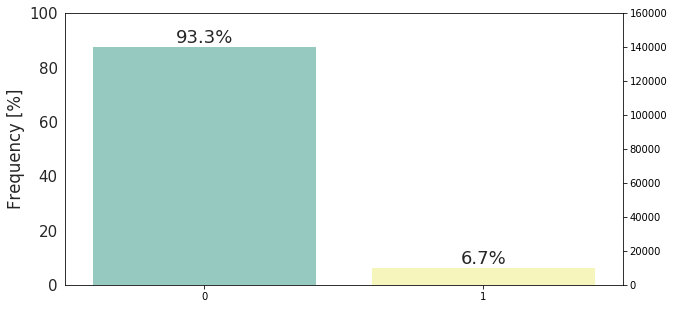

In [7]:
utils.basic_exploration(training)
plots.balance_outcome(training)

There is 90 % difference between both classes, and there are only a yes/no classes on the dataset.

A simple accuracy evaluation won't be good in this case, that's why they use a AUC on the competition.

### Age Analysis

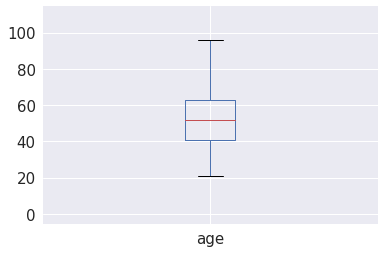

In [8]:
training['age'].plot.box()

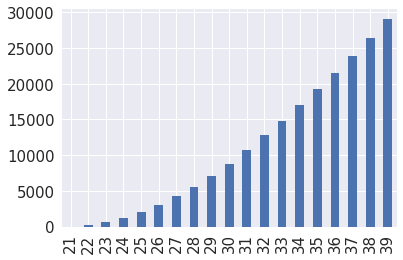

In [9]:
ages = utils.describe_ages(training, min_age=21, max_age=40)
ages.plot.bar()

In [10]:
# Looking at the age there is a lot of people older in the data
print training.query('age < 30 and SeriousDlqin2yrs == 0')['age'].count()
print training.query('age < 30 and SeriousDlqin2yrs == 1')['age'].count()

7786
1035


In [11]:
print training.query('age > 30 and SeriousDlqin2yrs == 0')['age'].count()
print training.query('age > 30 and SeriousDlqin2yrs == 1')['age'].count()

130460
8782


In [12]:
from collections import Counter

count = pd.DataFrame(Counter(training['NumberOfTime3059DaysPastDueNotWorse']).items(), 
                     columns=['Value', 'Count'])
count.sort_values(by=['Count'])
count.head(30)

,Value,Count
0,0,126018
1,1,16033
2,2,4598
3,3,1754
4,4,747
5,5,342
6,6,140
7,7,54
8,8,25
9,9,12


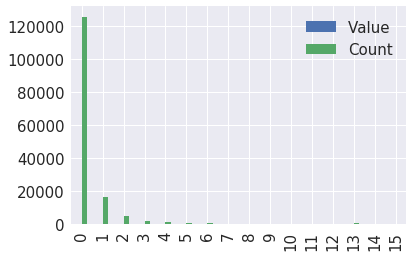

In [13]:
count.plot.bar()

In [14]:
training.query('NumberOfTime3059DaysPastDueNotWorse > 10')\
    .count()

SeriousDlqin2yrs                        273
RevolvingUtilizationOfUnsecuredLines    273
age                                     273
NumberOfTime3059DaysPastDueNotWorse     273
DebtRatio                               273
MonthlyIncome                           152
NumberOfOpenCreditLinesAndLoans         273
NumberOfTimes90DaysLate                 273
NumberRealEstateLoansOrLines            273
NumberOfTime6089DaysPastDueNotWorse     273
NumberOfDependents                      242
dtype: int64

There is a lot of 0's, probably the 98/96 which are the highest value would be a positive in the delinquence behavior.

In [15]:
training.query('SeriousDlqin2yrs == 1' + \
               'and NumberOfTime3059DaysPastDueNotWorse > 10').count()

SeriousDlqin2yrs                        150
RevolvingUtilizationOfUnsecuredLines    150
age                                     150
NumberOfTime3059DaysPastDueNotWorse     150
DebtRatio                               150
MonthlyIncome                            87
NumberOfOpenCreditLinesAndLoans         150
NumberOfTimes90DaysLate                 150
NumberRealEstateLoansOrLines            150
NumberOfTime6089DaysPastDueNotWorse     150
NumberOfDependents                      138
dtype: int64

In [16]:
training.query('SeriousDlqin2yrs == 0' + \
               'and NumberOfTime3059DaysPastDueNotWorse > 10').count()

SeriousDlqin2yrs                        123
RevolvingUtilizationOfUnsecuredLines    123
age                                     123
NumberOfTime3059DaysPastDueNotWorse     123
DebtRatio                               123
MonthlyIncome                            65
NumberOfOpenCreditLinesAndLoans         123
NumberOfTimes90DaysLate                 123
NumberRealEstateLoansOrLines            123
NumberOfTime6089DaysPastDueNotWorse     123
NumberOfDependents                      104
dtype: int64

Looking at the data like this, it seems nearly half for both, not much of a change.

In [21]:
income = training.MonthlyIncome
income = income.dropna()

income.head()

0     9120.0
1     2600.0
2     3042.0
3     3300.0
4    63588.0
Name: MonthlyIncome, dtype: float64

In [22]:
income.max()

3008750.0

In [23]:
income.min()

0.0

In [44]:
import numpy as np

income_classes = pd.Series(np.zeros(len(income)), name='MonthlyIncomeClass')

income_frame = pd.concat([income, income_classes], axis=1)

income_frame.head()

,MonthlyIncome,MonthlyIncomeClass
0,9120.0,0.0
1,2600.0,0.0
2,3042.0,0.0
3,3300.0,0.0
4,63588.0,0.0


In [59]:
max_income = income.max()
range_classes = [0, 3000, 10000, 30000, 50000, 100000]
# range_classes = [max_income // i for i in range(2, 7)]
# range_classes.insert(0, 0)
# range_classes = sorted(range_classes)

print(range_classes)

income_frame['MonthlyIncomeClass'] = pd.cut(income_frame.MonthlyIncome, 
                                            bins=range_classes,
                                            labels=[i for i in range(len(range_classes) -1)],
                                            include_lowest=True)

income_frame.head()

[0, 3000, 10000, 30000, 50000, 100000]


,MonthlyIncome,MonthlyIncomeClass
0,9120.0,1
1,2600.0,0
2,3042.0,1
3,3300.0,1
4,63588.0,4


In [60]:
print income_frame[income_frame.MonthlyIncomeClass == 0].count()
print income_frame.count()

MonthlyIncome         25085
MonthlyIncomeClass    25085
dtype: int64
MonthlyIncome         120270
MonthlyIncomeClass    120200
dtype: int64


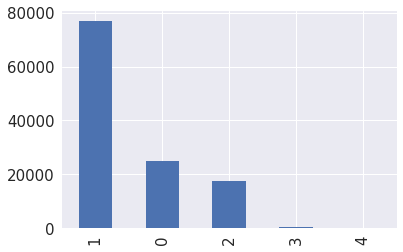

In [62]:
income_frame.MonthlyIncomeClass.value_counts().plot(kind='bar')

# Outlier Detections

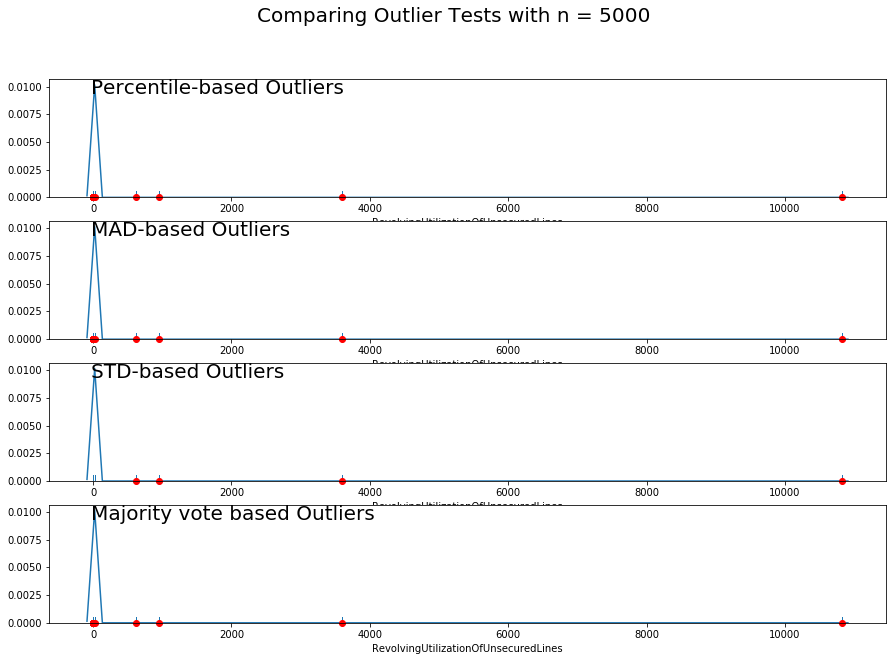

In [4]:
plots.outliers(training.RevolvingUtilizationOfUnsecuredLines.sample(5000))